In [43]:
#Reading the data(data Can be downloaded from blackboard)
file = "C:/Users/chink/Google Drive/Computational Statistics/3rd Quater/Regression/Course Material/oldfaithful.txt"
import pandas as pd
import numpy as np
data = pd.read_table(file,header = None,delimiter=r"\s+")

#Assignining column name to data
data.columns = ["sn.no","eruptions","waiting"]

#Mean of wait time 
np.mean(data['waiting'])


70.8970588235294

In [44]:
#Mean of 'eruptions'
np.mean(data['eruptions'])

3.4877830882352936

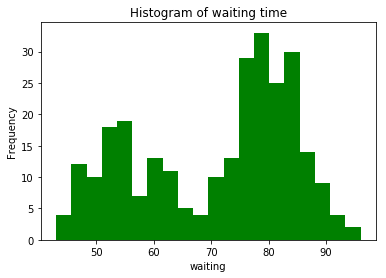

In [63]:
import matplotlib.pyplot as plt
plt.hist(data['waiting'],bins = 20,color = "green")
plt.xlabel("waiting")
plt.ylabel('Frequency')
plt.title('Histogram of waiting time')
plt.show()

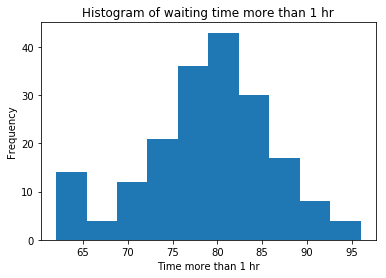

In [110]:
#Looking data where waiting time more than 60 mint 
data2 = data[data['waiting'] > 60]
plt.hist(data2['waiting'],bins = 10)
plt.xlabel('Time more than 1 hr')
plt.ylabel('Frequency')
plt.title('Histogram of waiting time more than 1 hr')
plt.show()

In [115]:
#Where eruptions are more than 5 mint 
data[data['eruptions'] > 5]

,sn.no,eruptions,waiting
75,76,5.067,76
148,149,5.100,96
150,151,5.033,77


In [122]:
#Number of observation where wait time is more than 60 mint and eruptions is more than 4 mint
data[(data['eruptions'] > 4) & (data['waiting'] > 60)].count()

sn.no        132
eruptions    132
waiting      132
dtype: int64

In [123]:
#Means more wait, good result 
data[(data['eruptions'] > 4) & (data['waiting'] < 60)].count()

sn.no        0
eruptions    0
waiting      0
dtype: int64

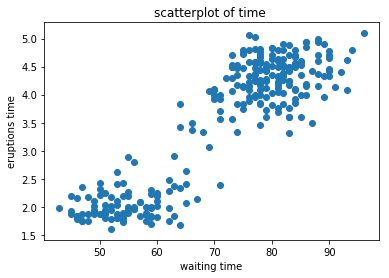

In [127]:
#Scatter plot of waiting and eruption
plt.scatter(data['waiting'],data['eruptions'])
plt.xlabel('waiting time')
plt.ylabel('eruptions time')
plt.title('scatterplot of time ')
plt.show()

In [130]:
#Finding correlation of waiting time and eruptions time
data['waiting'].corr(data['eruptions'])

0.90081116832181274

In [133]:
#correlation matrix
data.corr()

,sn.no,eruptions,waiting
sn.no,1.000000,0.039984,0.007926
eruptions,0.039984,1.000000,0.900811
waiting,0.007926,0.900811,1.000000


In [225]:
#Running model
from sklearn.linear_model import LinearRegression

# Appling Regression
data_y = data['waiting']
data_x = data.drop('waiting',axis = 1)
reg = LinearRegression()
model = reg.fit(data_x,data_y)

#Intercept=33.4744 and coef =10.7296
[model.intercept_ ,model.coef_]


[33.474397022753365, array([ 10.7296414])]

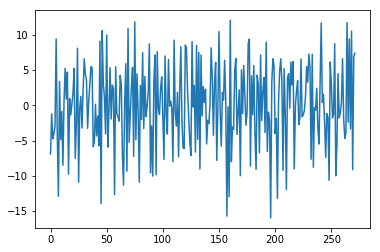

In [234]:
#Fitted value
fit = model.predict(data_x)

#Residuals 
residuals = fit - data_y
plt.plot(residuals)
plt.show()



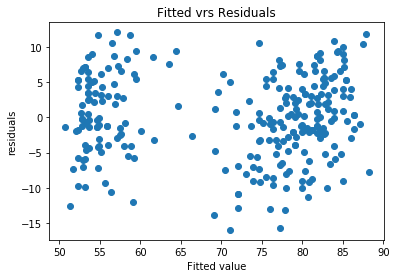

In [238]:
#Residuals vrs fitted plot
plt.scatter(fit,residuals)
plt.xlabel('Fitted value')
plt.ylabel('residuals')
plt.title('Fitted vrs Residuals')
plt.show()

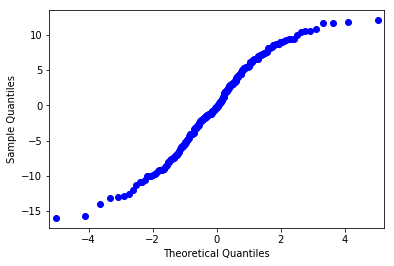

In [243]:
#Normality of Residuals
import scipy.stats as stats
import statsmodels.api as sm
sm.qqplot(residuals, stats.t, distargs=(4,))
